# Review

In [1]:
import numpy as np
import pandas as pd

## Data frames: Masking

In [2]:
flights = pd.read_csv('./data/flight_sample.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [3]:
print(flights['AIRLINE'] == 'AA')
aa_flights = flights[ flights['AIRLINE'] == 'AA' ]
aa_flights

0       False
1       False
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Name: AIRLINE, Length: 10000, dtype: bool


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
2,2015,10,16,5,AA,1382,13.0,25.0,761
19,2015,3,9,1,AA,1677,9.0,17.0,432
43,2015,6,12,5,AA,2411,8.0,20.0,2585
55,2015,10,20,2,AA,1858,14.0,10.0,507
59,2015,12,10,4,AA,1033,4.0,12.0,1192
...,...,...,...,...,...,...,...,...,...
9953,2015,5,30,6,AA,149,15.0,10.0,1739
9971,2015,12,27,7,AA,2368,NaN,NaN,224
9975,2015,7,22,3,AA,550,18.0,16.0,370
9989,2015,7,9,4,AA,2028,12.0,12.0,257


In [5]:
flight_count2 = np.sum(flights['AIRLINE'] == 'AA')
print(np.sum(flights['AIRLINE'] == 'AA'))
print((flights['AIRLINE'] == 'AA').sum())
print( "there are {} AA flights in the set".format(flight_count2))
# why do we use sum() ^^
print(aa_flights.shape)
aa_flights.head()

1216
1216
there are 1216 AA flights in the set
(1216, 9)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
2,2015,10,16,5,AA,1382,13.0,25.0,761
19,2015,3,9,1,AA,1677,9.0,17.0,432
43,2015,6,12,5,AA,2411,8.0,20.0,2585
55,2015,10,20,2,AA,1858,14.0,10.0,507
59,2015,12,10,4,AA,1033,4.0,12.0,1192


In [6]:
aa_flights_long = flights[ (flights['AIRLINE'] == 'AA') & (flights['DISTANCE'] > 1000) ]
# what if you wanted to filter on flights less than 1000 or greater than 2000?
aa_flights_long.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
43,2015,6,12,5,AA,2411,8.0,20.0,2585
59,2015,12,10,4,AA,1033,4.0,12.0,1192
82,2015,11,8,7,AA,1391,5.0,23.0,1121
92,2015,4,20,1,AA,333,8.0,13.0,1144
100,2015,7,1,3,AA,575,2.0,23.0,1788


## Aggregate Functions

In [7]:
aa_flights.mean()

YEAR             2015.000000
MONTH               7.097862
DAY                16.024671
DAY_OF_WEEK         4.055921
FLIGHT_NUMBER    1266.090461
TAXI_IN             9.092593
TAXI_OUT           17.785354
DISTANCE         1053.736842
dtype: float64

In [9]:
print(aa_flights['TAXI_OUT'].max())
print("%%%%%%%%%%%%%%%")
print(aa_flights[['TAXI_OUT', 'TAXI_IN']].max())
print("%%%%%%%%%%%%%%%")
print(aa_flights.max())

110.0
%%%%%%%%%%%%%%%
TAXI_OUT    110.0
TAXI_IN      60.0
dtype: float64
%%%%%%%%%%%%%%%
YEAR             2015
MONTH              12
DAY                31
DAY_OF_WEEK         7
AIRLINE            AA
FLIGHT_NUMBER    2580
TAXI_IN            60
TAXI_OUT          110
DISTANCE         3784
dtype: object


In [10]:
# Get unique list of Airlines
print(flights['AIRLINE'].unique())

# get count of unique airlines
print(len(flights['AIRLINE'].unique()))
print(flights['AIRLINE'].nunique())

['EV' 'WN' 'AA' 'HA' 'US' 'UA' 'MQ' 'DL' 'OO' 'AS' 'B6' 'VX' 'F9' 'NK']
14
14


## aggregate()

What was the aggregate() function and how was it more flexible than just calling mean() or median(). Wasn't there something about renaming columns as well?

## Dataframes: Indexes

In [11]:
scores = pd.read_csv('./data/college-scorecard-data-scrubbed.csv', encoding='latin-1')
# what if you want to set the index as you load the data frame ^^
# what does 'encoding' do?

scores.set_index('institution_name', inplace=True)
scores.head()

,UNITID,OPEID,OPEID6,city,state,url,predominant_degree_code,predominant_degree_desc,institutional_owner_code,institutional_owner_desc,...,pell_grant_receipents,full_time_retention_rate_4_year,full_time_retention_rate_less_than_4_year,part_time_rentention_rate_4_year,part_time_rentention_rate_less_than_4_year,students_with_federal_loans,median_student_earnings,median_student_debt,less_than_4_year_school_completion_rate,4_year_school_completion_rate
institution_name,,,,,,,,,,,,,,,,,,,,,
Alaska Bible College,102580,884300,8843,Palmer,AK,www.akbible.edu/,3,Bachelors,2,PrivateNonProfit,...,0.3571,0.3333,NaN,NaN,NaN,0.2857,NaN,PrivacySuppressed,NaN,NaN
Alaska Career College,103501,2541000,25410,Anchorage,AK,www.alaskacareercollege.edu,1,Certificate,3,PrivateForProfit,...,0.7078,NaN,0.7941,NaN,NaN,0.7860,28700,8994,0.707589494,NaN
Alaska Christian College,442523,4138600,41386,Soldotna,AK,www.alaskacc.edu,1,Certificate,2,PrivateNonProfit,...,0.8868,NaN,0.4737,NaN,1.0,0.6792,NaN,PrivacySuppressed,0,NaN
Alaska Pacific University,102669,106100,1061,Anchorage,AK,www.alaskapacific.edu,3,Bachelors,2,PrivateNonProfit,...,0.3152,0.7742,NaN,1.0,NaN,0.5297,47000,23250,NaN,0.514833663
AVTEC-Alaska's Institute of Technology,102711,3160300,31603,Seward,AK,www.avtec.edu/,1,Certificate,1,Public,...,0.0737,NaN,1.0000,NaN,1.0,0.0664,33500,PrivacySuppressed,0.846055789,NaN


In [13]:
scores = pd.read_csv('./data/college-scorecard-data-scrubbed.csv', encoding='latin-1')
scores.set_index('institution_name', inplace=True)

# use loc[] to access row (Panda Series) by index
scores.loc['University of Notre Dame']['url']

'www.nd.edu'

In [14]:
# if you are returning to this specific row, you can store it for easy access
nd = scores.loc['University of Notre Dame']
print("Notre Dame's top sat reading and math percentile is {} and {} respectively...".format(
        nd['sat_reading_75'], 
        nd['sat_math_75'])
     )

Notre Dame's top sat reading and math percentile is 750.0 and 770.0 respectively...


In [16]:
# You can slice via index with both numerical values and strings (also dates)
scores.loc['University of Chicago':'University of Notre Dame'][:5]
scores.loc['University of Chicago':'University of Notre Dame'][-2:]

,UNITID,OPEID,OPEID6,city,state,url,predominant_degree_code,predominant_degree_desc,institutional_owner_code,institutional_owner_desc,...,pell_grant_receipents,full_time_retention_rate_4_year,full_time_retention_rate_less_than_4_year,part_time_rentention_rate_4_year,part_time_rentention_rate_less_than_4_year,students_with_federal_loans,median_student_earnings,median_student_debt,less_than_4_year_school_completion_rate,4_year_school_completion_rate
institution_name,,,,,,,,,,,,,,,,,,,,,
University of Indianapolis,151263,180400,1804,Indianapolis,IN,uindy.edu,3,Bachelors,2,PrivateNonProfit,...,0.3638,0.7392,NaN,0.2581,NaN,0.6441,41400,27000,NaN,0.542975912
University of Notre Dame,152080,184000,1840,Notre Dame,IN,www.nd.edu,3,Bachelors,2,PrivateNonProfit,...,0.1118,0.9802,NaN,NaN,NaN,0.3997,70100,21250,NaN,0.95295766


In [21]:
scores = pd.read_csv('./data/college-scorecard-data-scrubbed.csv', encoding='latin-1')
scores_multi_indexed = scores.set_index(['state', 'institution_name'])
scores_multi_indexed.loc['IN']
scores_multi_indexed.loc['MI']
scores_multi_indexed.loc['IN','University of Notre Dame']
# scores_multi_indexed.loc['IN'].loc['University of Notre Dame']

/Users/jarp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


,,UNITID,OPEID,OPEID6,city,url,predominant_degree_code,predominant_degree_desc,institutional_owner_code,institutional_owner_desc,locale,...,pell_grant_receipents,full_time_retention_rate_4_year,full_time_retention_rate_less_than_4_year,part_time_rentention_rate_4_year,part_time_rentention_rate_less_than_4_year,students_with_federal_loans,median_student_earnings,median_student_debt,less_than_4_year_school_completion_rate,4_year_school_completion_rate
state,institution_name,,,,,,,,,,,,,,,,,,,,,
IN,University of Notre Dame,152080,184000,1840,Notre Dame,www.nd.edu,3,Bachelors,2,PrivateNonProfit,21,...,0.1118,0.9802,NaN,NaN,NaN,0.3997,70100,21250,NaN,0.95295766


## Dropping and Filling Missing Data

In [22]:
scores = pd.read_csv('./data/college-scorecard-data-scrubbed.csv', encoding='latin-1', index_col="institution_name")
# Dropping columns
print("Shape of entire scores DF", scores.shape)

scores.drop('white_percentage', inplace=True, axis=1)
scores.drop(['black_percentage',
       'hispanic_percent', 'asian_precent',
       'american_indian_or_alaskan_native_precent',
       'native_hawaiian_pacific_islander_percentage',
       'two_or_more_races_percentage', 'non_resident_alients_percentage',
       'unknown_percentage'], inplace=True, axis=1)

print(scores.shape)
scores.head()

Shape of entire scores DF (7282, 62)
(7282, 53)


,UNITID,OPEID,OPEID6,city,state,url,predominant_degree_code,predominant_degree_desc,institutional_owner_code,institutional_owner_desc,...,pell_grant_receipents,full_time_retention_rate_4_year,full_time_retention_rate_less_than_4_year,part_time_rentention_rate_4_year,part_time_rentention_rate_less_than_4_year,students_with_federal_loans,median_student_earnings,median_student_debt,less_than_4_year_school_completion_rate,4_year_school_completion_rate
institution_name,,,,,,,,,,,,,,,,,,,,,
Alaska Bible College,102580,884300,8843,Palmer,AK,www.akbible.edu/,3,Bachelors,2,PrivateNonProfit,...,0.3571,0.3333,NaN,NaN,NaN,0.2857,NaN,PrivacySuppressed,NaN,NaN
Alaska Career College,103501,2541000,25410,Anchorage,AK,www.alaskacareercollege.edu,1,Certificate,3,PrivateForProfit,...,0.7078,NaN,0.7941,NaN,NaN,0.7860,28700,8994,0.707589494,NaN
Alaska Christian College,442523,4138600,41386,Soldotna,AK,www.alaskacc.edu,1,Certificate,2,PrivateNonProfit,...,0.8868,NaN,0.4737,NaN,1.0,0.6792,NaN,PrivacySuppressed,0,NaN
Alaska Pacific University,102669,106100,1061,Anchorage,AK,www.alaskapacific.edu,3,Bachelors,2,PrivateNonProfit,...,0.3152,0.7742,NaN,1.0,NaN,0.5297,47000,23250,NaN,0.514833663
AVTEC-Alaska's Institute of Technology,102711,3160300,31603,Seward,AK,www.avtec.edu/,1,Certificate,1,Public,...,0.0737,NaN,1.0000,NaN,1.0,0.0664,33500,PrivacySuppressed,0.846055789,NaN


In [23]:
# working with just a subset, this might be esasier
scores_small = scores[['city','state','url', 'predominant_degree_desc', 'sat_math_25', 'sat_reading_25', 'sat_math_75', 'sat_reading_75']].copy(deep=True)
print(scores_small.shape)

(7282, 8)


In [26]:
# see how many null values we have...
scores_small.isnull().sum()

# scores_small_clean = scores_small.dropna().copy()
# scores_small_clean.shape
scores.isnull().sum()

UNITID                                           0
OPEID                                            0
OPEID6                                           0
city                                             0
state                                            0
url                                             57
predominant_degree_code                          0
predominant_degree_desc                          0
institutional_owner_code                         0
institutional_owner_desc                         0
locale                                           0
men_only                                         0
women_only                                       0
religious_affiliation_code                     173
religious_affiliation_desc                       0
sat_reading_25                                6087
sat_reading_75                                6087
sat_math_25                                   6074
sat_math_75                                   6074
sat_writing_25                 

In [27]:
# if you drop na on a dataset, it will drop rows that have ANY missing data
# print("entire df", scores.isnull().sum())
print("entire df", scores.shape)
print("drop all in entire df", scores.dropna().shape)

print("small df", scores_small.shape)
scores_clean = scores_small.dropna().copy(deep=True)
print("dropna on entire 'clean'' df", scores_clean.shape)

entire df (7282, 53)
drop all in entire df (0, 53)
small df (7282, 8)
dropna on entire 'clean'' df (1194, 8)


In [28]:
scores_small['sat_math_75'].fillna(int(scores_small['sat_math_75'].mean()), inplace=True)
scores_small['sat_reading_75'].fillna(0, inplace=True)

scores_small.fillna(scores_small.mean(), inplace=True)
print("fillna() on entire small df", scores_small.shape)


fillna() on entire small df (7282, 8)


In [29]:
scores_small.sample(5)

,city,state,url,predominant_degree_desc,sat_math_25,sat_reading_25,sat_math_75,sat_reading_75
institution_name,,,,,,,,
Indiana State University,Terre Haute,IN,www.indstate.edu,Bachelors,400.000000,410.000000,510.0,510.0
Neosho County Community College,Chanute,KS,www.neosho.edu,Certificate,475.693709,468.421757,585.0,0.0
Empire Beauty School-Elizabethtown,Elizabethtown,KY,www.empire.edu,Certificate,475.693709,468.421757,585.0,0.0
Ohio Center for Broadcasting-Valley View,Valley View,OH,www.beonair.com,Certificate,475.693709,468.421757,585.0,0.0
Bryant & Stratton College-Richmond,North Chesterfield,VA,www.bryantstratton.edu,Associates,475.693709,468.421757,585.0,0.0


## Composing New Series/Columns 

In [30]:
# create new column that totals the reading and math
scores_clean['sat_total_75'] = scores_clean['sat_math_75'] + scores_clean['sat_reading_75']

# get the overal average
overall_sat_mean = scores_clean['sat_total_75'].mean()
print(overall_sat_mean)

# create a new column that diffs the total for each school
scores_clean['sat_diff_75'] = scores_clean['sat_total_75'] - overall_sat_mean
scores_clean.sample(5)


1162.2981574539363


,city,state,url,predominant_degree_desc,sat_math_25,sat_reading_25,sat_math_75,sat_reading_75,sat_total_75,sat_diff_75
institution_name,,,,,,,,,,
University of St Thomas,Houston,TX,www.stthom.edu,Bachelors,500.0,490.0,620.0,600.0,1220.0,57.701843
Lafayette College,Easton,PA,https://www.lafayette.edu/,Bachelors,620.0,580.0,720.0,680.0,1400.0,237.701843
Reinhardt University,Waleska,GA,www.reinhardt.edu,Bachelors,440.0,450.0,545.0,550.0,1095.0,-67.298157
Dakota State University,Madison,SD,dsu.edu,Bachelors,415.0,435.0,575.0,560.0,1135.0,-27.298157
Austin College,Sherman,TX,www.austincollege.edu,Bachelors,540.0,530.0,650.0,670.0,1320.0,157.701843


### idxmax() and idxmin()

In [31]:
highest_school = scores_clean['sat_diff_75'].idxmax()
lowest_school = scores_clean['sat_diff_75'].idxmin()

print("{} has the highest score with {} ({})".format(highest_school, scores_clean.loc[highest_school]['sat_total_75'], scores_clean.loc[highest_school]['sat_diff_75']))

low_school_data = scores_clean.loc[lowest_school]

print("{} has the lowest score with {} ({})".format(lowest_school, low_school_data['sat_total_75'], low_school_data['sat_diff_75']))

California Institute of Technology has the highest score with 1600.0 (437.70184254606374)
Hiwassee College has the lowest score with 640.0 (-522.2981574539363)


In [32]:
print(scores.loc[highest_school][['city', 'url', 'sat_reading_75', 'sat_reading_75']])
print(scores.loc[lowest_school][['city', 'url', 'sat_reading_75', 'sat_reading_75']])

city                     Pasadena
url               www.caltech.edu
sat_reading_75                800
sat_reading_75                800
Name: California Institute of Technology, dtype: object
city                  Madisonville
url               www.hiwassee.edu
sat_reading_75                 315
sat_reading_75                 315
Name: Hiwassee College, dtype: object


## Using Apply() to compose new columns in a data frame

In [34]:
# create the column for summed sat scores
scores_clean['sat_total_25'] = scores_clean['sat_math_25'] + scores_clean['sat_reading_25']

# get overal average
overall_sat_mean_25 = scores_clean['sat_total_25'].mean()

def calculate_diff(total):
    return total - overall_sat_mean_25


In [35]:
# use function to calculate diff
scores_clean['sat_diff_25'] = scores_clean['sat_total_25'].apply(calculate_diff)

highest_score = scores_clean['sat_diff_25'].idxmax()
lowest_score = scores_clean['sat_diff_25'].idxmin()

print("{} has the highest score with {} ({})".format(highest_score, scores_clean.loc[highest_score]['sat_total_25'], scores_clean.loc[highest_score]['sat_diff_25']))

low_school = scores_clean.loc[lowest_score]

print("{} has the lowest score with {} ({})".format(lowest_score, low_school['sat_total_25'], low_school['sat_diff_25']))
scores_clean.head()

nd = scores_clean.loc['University of Notre Dame']
print("by the way... Notre dames numbers are 75: {} | {} and 25: {} | A diff of {}".format(int(nd['sat_total_75']), int(nd['sat_diff_75']), int(nd['sat_total_25']), int(nd['sat_diff_25'])))


California Institute of Technology has the highest score with 1500.0 (555.6247906197655)
Concordia College Alabama has the lowest score with 520.0 (-424.37520938023454)
by the way... Notre dames numbers are 75: 1520 | 357 and 25: 1340 | A diff of 395


### Group By

In [36]:
flights = pd.read_csv('./data/flight_sample.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [40]:
# simple group by
flights_by_airline = flights.groupby(['AIRLINE'])
flights_by_airline.groups
flights_by_airline.head()
flights_by_airline.mean()
flights_by_airline.mean().loc['AA']

YEAR             2015.000000
MONTH               7.097862
DAY                16.024671
DAY_OF_WEEK         4.055921
FLIGHT_NUMBER    1266.090461
TAXI_IN             9.092593
TAXI_OUT           17.785354
DISTANCE         1053.736842
Name: AA, dtype: float64

In [44]:
# group by on mulitple columns
flights_by_airline_and_month = flights.groupby(['AIRLINE', 'MONTH'])
flights_by_airline_and_month.max()[:5]

flights_by_airline_and_month.mean().loc['AA'].loc[3]
flights_by_airline_and_month.mean().loc['AA',3]
flights_by_airline_and_month.mean().loc['AA'].loc[3:9]['DISTANCE']
flights_by_airline_and_month.mean().loc['AA'].loc[3:9]['DISTANCE'].idxmax()

7

In [45]:
# what is the longest flight AA flew in July 2015 
# and now much longer (or shorter) than in December of that year

print("July: ", flights_by_airline_and_month.max().loc['AA', 7]['DISTANCE'])
print("December: ", flights_by_airline_and_month.max().loc['AA', 12]['DISTANCE'])
print(flights_by_airline_and_month.max().loc['AA', 7]['DISTANCE'] - flights_by_airline_and_month.max().loc['AA', 12]['DISTANCE'])

July:  2979.0
December:  3711.0
-732.0


In [ ]:
# How would you sort a dataframe by a specific column?

## Pivot Tables

In [46]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [47]:
flight_pvt = flights.pivot_table('DISTANCE',index='DAY_OF_WEEK', columns = 'AIRLINE')
# flight_pvt = flights.pivot_table('DISTANCE',index='DAY_OF_WEEK', columns = 'AIRLINE', aggfunc=[np.max, np.min])

flight_pvt


AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
DAY_OF_WEEK,,,,,,,,,,,,,,
1,997.473684,1112.937500,1151.468750,965.879070,458.555556,978.600000,594.666667,436.787879,1059.187500,541.919463,1230.671533,844.468085,1730.722222,727.905363
2,966.558282,1341.962963,959.526316,803.039130,439.956835,1136.600000,672.590909,436.225000,955.409091,498.405229,1220.741379,957.204545,1320.833333,734.848101
3,1156.026490,1051.283019,1110.000000,882.626016,493.901515,945.846154,700.666667,397.300000,985.918919,514.927152,1239.507576,903.391304,1143.000000,699.512821
4,1060.070270,1244.636364,1081.441558,847.391489,453.721893,1085.760000,619.550000,416.292683,952.100000,511.726115,1156.680851,958.594595,1642.450000,682.577287
5,1080.830986,1301.545455,1090.080645,792.962085,489.294964,994.409091,1016.714286,450.128205,1037.729730,533.357143,1265.582677,981.840000,1272.500000,725.507508
6,1107.097403,1143.925000,1022.677966,893.522989,459.923729,1007.076923,966.428571,428.944444,931.125000,515.792308,1269.442623,999.789474,951.285714,754.421818
7,1015.888268,1190.022727,1052.526316,858.623188,472.037594,1030.250000,1131.733333,475.271429,996.137931,500.326531,1339.815126,1050.736842,1702.100000,736.471698


## Time Series

In [48]:
goog = pd.read_csv("./data/Google_Stock_Price.csv")
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,231.494354,236.789917,229.065155,232.284210,232.284210,15513200
1,2007-01-04,232.984665,240.411362,232.661758,240.068588,240.068588,15877700
2,2007-01-05,239.691040,242.174881,237.510223,242.020889,242.020889,13833500
3,2007-01-08,242.269272,243.352234,239.542007,240.227554,240.227554,9570600
4,2007-01-09,241.156509,242.547470,239.045242,241.181351,241.181351,10832700


In [49]:
# convert column to a date object
goog['Date'] = pd.to_datetime(goog['Date'])
print(goog.dtypes)

goog.set_index('Date', inplace=True)
goog.head()

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,231.494354,236.789917,229.065155,232.284210,232.284210,15513200
2007-01-04,232.984665,240.411362,232.661758,240.068588,240.068588,15877700
2007-01-05,239.691040,242.174881,237.510223,242.020889,242.020889,13833500
2007-01-08,242.269272,243.352234,239.542007,240.227554,240.227554,9570600
2007-01-09,241.156509,242.547470,239.045242,241.181351,241.181351,10832700


In [53]:
# Get rows based on year
goog.loc['2007'][:3]

# Get rows based on month
goog.loc['March 2007'][:3]

# Slice frame by date
goog.loc['2007-3-23': '2008-3-23':7]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-03-23,229.234055,230.197784,227.063171,229.422821,229.422821,8276000
2007-04-03,230.525650,235.592697,230.500809,234.773026,234.773026,13088100
2007-04-13,232.711441,232.870407,230.182877,231.638412,231.638412,5625800
2007-04-24,237.758606,238.439178,236.238495,237.222092,237.222092,7437400
2007-05-03,231.603638,235.503281,231.141647,235.085999,235.085999,7235000
2007-05-14,231.236038,232.244476,228.513733,229.397980,229.397980,7795600
2007-05-23,238.856476,240.143097,235.344315,235.453598,235.453598,10186200
2007-06-04,247.346252,253.605545,247.187286,251.896652,251.896652,14294300
2007-06-13,251.906586,252.626907,247.733734,250.987564,250.987564,14159400


In [57]:
goog_end_year = goog.asfreq('A')
goog_end_year
goog_avg = goog.resample('A').mean()
goog_avg
goog_res = goog.resample('Q').mean().loc['2010': '2014']
goog_res

# what was that about rolling? 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-31,277.653476,280.143673,274.745260,277.376913,277.376913,7.421944e+06
2010-06-30,255.746063,258.206487,252.068395,254.719092,254.719092,6.853251e+06
2010-09-30,239.220973,241.669423,237.101866,239.554507,239.554507,5.720194e+06
2010-12-31,293.431744,295.256359,291.137756,293.025248,293.025248,5.663852e+06
2011-03-31,300.079243,302.213747,297.448528,299.830777,299.830777,5.259444e+06
2011-06-30,262.865946,264.529334,260.538228,262.353879,262.353879,5.581833e+06
2011-09-30,273.659638,277.175755,270.071336,273.493610,273.493610,7.751888e+06
2011-12-31,294.801961,297.786836,292.309049,295.334688,295.334688,6.152779e+06
2012-03-31,306.262653,308.452682,303.713266,306.279719,306.279719,5.465448e+06


## Line Plots


In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# what is seaborn? what is it used for?

In [59]:
roster = pd.read_csv('./data/nd-football-2018-roster.csv', index_col='Number')
roster.head()

,Name,Position,Height,Weight,Class,Hometown
Number,,,,,,
2,Dexter Williams,RB,71,215,Sr.,"Orlando, FL/West Orange"
2,Jordan Genmark Heath,LB,73,225,Soph.,"San Diego, CA/Cathedral Catholic"
3,Avery Davis,QB,71,204,Soph.,"Cedar Hill, TX/HS"
3,Houston Griffith,S,72,205,Fr.,"Chicago, IL/IMG Academy (FL)"
4,Te'von Coney,LB,73,240,Sr.,"Palm Beach Gardens, FL/HS"


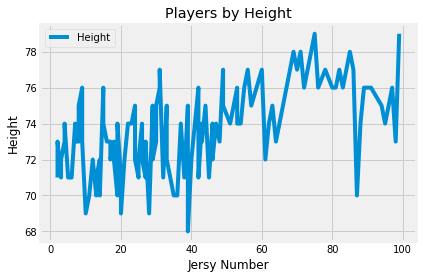

In [60]:
figure,axes = plt.subplots()
# what are the other ways to style the lines?
axes.plot(roster.index, roster['Height'], label="Height")

# what are the different ways you can style the chart and legend?
axes.set_xlabel('Jersy Number')
axes.set_ylabel('Height')
axes.set_title('Players by Height')
axes.legend()


# how do you limit the size of the x and y coordinates? 'xlim' something?

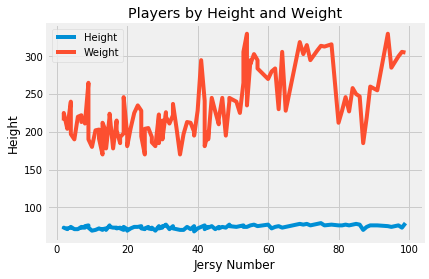

In [61]:
figure,axes = plt.subplots()
axes.plot(roster.index, roster['Height'], label="Height")
axes.plot(roster.index, roster['Weight'], label="Weight")

axes.set_xlabel('Jersy Number')
axes.set_ylabel('Height')
axes.set_title('Players by Height and Weight')
axes.legend()

## Multiple Subplots

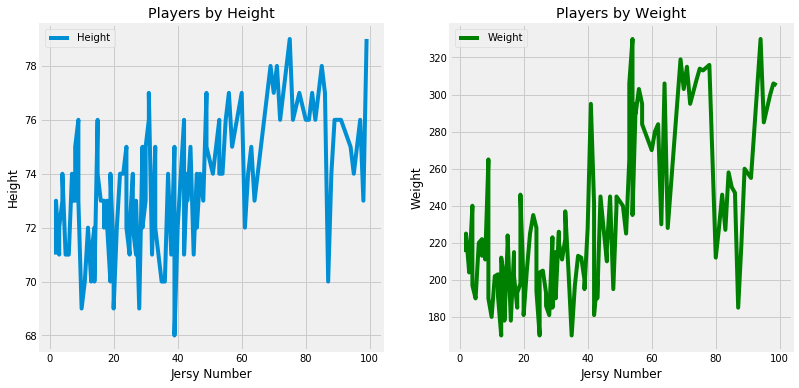

In [62]:
figure,axes = plt.subplots(1,2, figsize=(12,6))
axes[0].plot(roster.index, roster['Height'], label="Height")

axes[0].set_xlabel('Jersy Number')
axes[0].set_ylabel('Height')
axes[0].set_title('Players by Height')
axes[0].legend()

axes[1].plot(roster.index, roster['Weight'], label="Weight", color='Green')

axes[1].set_xlabel('Jersy Number')
axes[1].set_ylabel('Weight')
axes[1].set_title('Players by Weight')
axes[1].legend()

# What is sharey=True and when/why would you use it

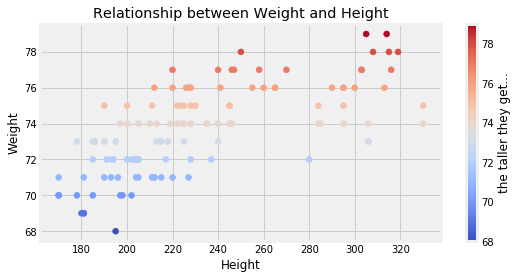

In [63]:
# Scatter Plots

figure,axes = plt.subplots(figsize=(8,4))
img = axes.scatter(
    roster['Weight'], roster['Height'],
    c=roster['Height'], cmap='coolwarm'
)

axes.set_title("Relationship between Weight and Height")
axes.set_xlabel('Height')
axes.set_ylabel('Weight')

figure.colorbar(img, label="the taller they get...")

## Histograms

(array([ 1.,  3.,  7., 13., 15., 14., 20., 13., 15.,  9.,  4.,  2.]),
 array([68.        , 68.91666667, 69.83333333, 70.75      , 71.66666667,
        72.58333333, 73.5       , 74.41666667, 75.33333333, 76.25      ,
        77.16666667, 78.08333333, 79.        ]),
 <a list of 12 Patch objects>)

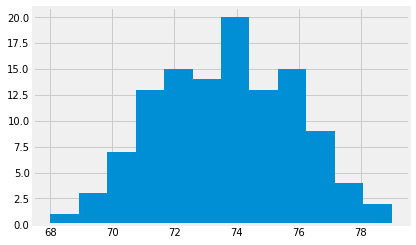

In [65]:
figure, axes = plt.subplots()
axes.hist(roster['Height'], bins=12)
# what does bins do? In this case is 18 a good number

In [ ]:
# create a mask with the OR bitwise operator
roster[( roster['Class'] == 'Sr.') | (roster['Class'] == 'Jr.')][:5]

Text(0.5, 0, 'Weight')

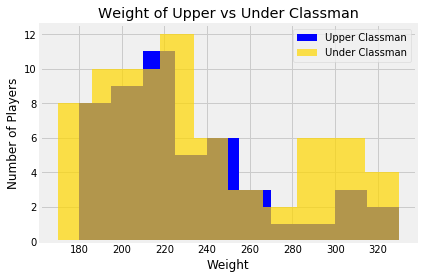

In [66]:
figure, axes = plt.subplots()
upper = roster[( roster['Class'] == 'Sr.') | (roster['Class'] == 'Jr.')]
under = roster[~( roster['Class'] == 'Sr.') & ~(roster['Class'] == 'Jr.')]

axes.hist(upper['Weight'], label="Upper Classman", alpha=1, color="blue")
axes.hist(under['Weight'], label="Under Classman", alpha=.7, color="gold")

axes.legend()
axes.set_title("Weight of Upper vs Under Classman")
axes.set_ylabel("Number of Players")
axes.set_xlabel("Weight")

## 2D Histogram

(9829, 9)


Text(0, 0.5, 'Taxi Out')

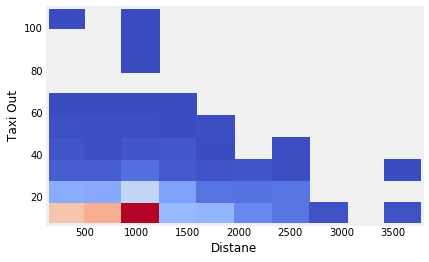

In [67]:
flights_clean = flights.dropna()
print(flights_clean.shape)

figure, axes = plt.subplots()
image = axes.hist2d(
    flights_clean[ (flights_clean['AIRLINE'] == 'AA')]['DISTANCE'],
    flights_clean[ (flights_clean['AIRLINE'] == 'AA')]['TAXI_OUT'],
    cmin=1,
    cmap='coolwarm'
)

axes.set_xlabel("Distane")
axes.set_ylabel("Taxi Out")

## Bar Plots

In [70]:
flights_by_airline_and_month.sum().head()

YEAR   DAY  DAY_OF_WEEK  FLIGHT_NUMBER  TAXI_IN  TAXI_OUT  \
AIRLINE MONTH                                                                
AA      1      177320  1456          369         106764    780.0    1425.0   
        2      149110  1114          270          85682    729.0    1261.0   
        3      179335  1557          362         101246    833.0    1461.0   
        4      175305  1468          340         119600    889.0    1538.0   
        5      161200  1293          360         107882    643.0    1361.0   

               DISTANCE  
AIRLINE MONTH            
AA      1        101373  
        2         73909  
        3         96806  
        4         84284  
        5         84469

In [69]:
# gonna be using this...
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

Text(0.5, 0, 'Months')

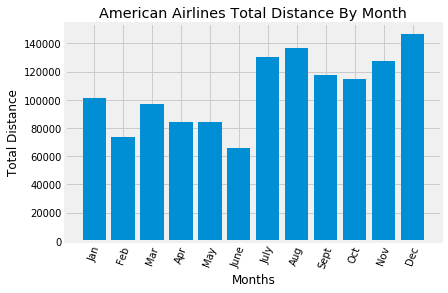

In [71]:
figure,axes = plt.subplots()
aa_flights = flights_by_airline_and_month.sum().loc['AA']
axes.bar(range(len(aa_flights.index)), aa_flights['DISTANCE'])

axes.set_xticks(range(len(aa_flights.index)))
axes.set_xticklabels(months, rotation=70)

axes.set_title('American Airlines Total Distance By Month')
axes.set_ylabel('Total Distance')
axes.set_xlabel('Months')

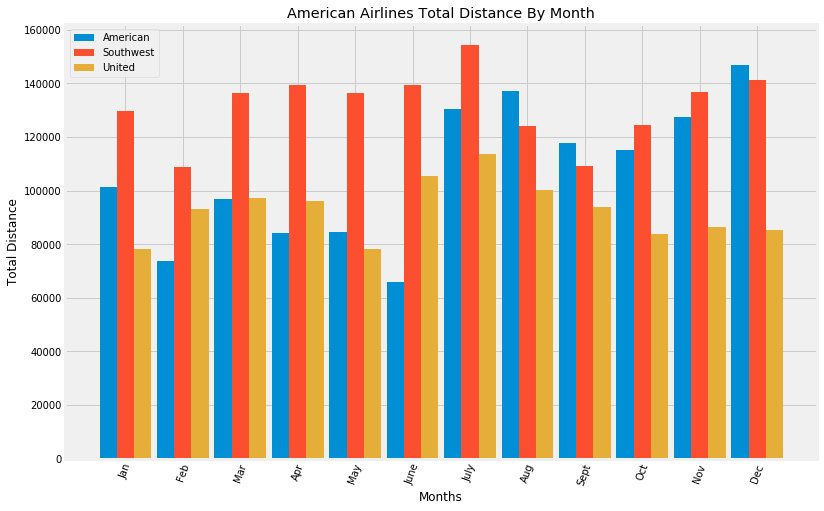

In [72]:

figure,axes = plt.subplots(figsize=(12,8))

offset = .3
axes.bar(np.arange(12) - offset, flights_by_airline_and_month.sum().loc['AA']['DISTANCE'], width=offset, label='American')
axes.bar(np.arange(12), flights_by_airline_and_month.sum().loc['WN']['DISTANCE'], width=offset, label='Southwest')
axes.bar(np.arange(12) + offset, flights_by_airline_and_month.sum().loc['UA']['DISTANCE'], width=offset, label='United')

axes.set_xticks(np.arange(12))
axes.set_xticklabels(months, rotation=70)

axes.set_title('American Airlines Total Distance By Month')
axes.set_ylabel('Total Distance')
axes.set_xlabel('Months')

axes.legend()

## Back to Time

/Users/jarp/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


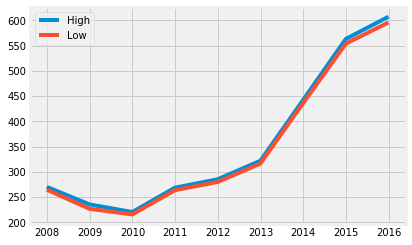

In [73]:
fig,axes = plt.subplots()
axes.plot(goog_avg.index, goog_avg['High'], label='High')
axes.plot(goog_avg.index, goog_avg['Low'], label='Low')

axes.legend()

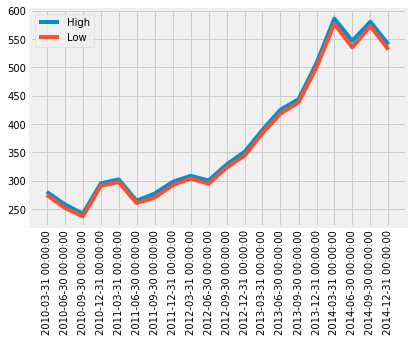

In [74]:
fig,axes = plt.subplots()
axes.plot(goog_res.index, goog_res['High'], label='High')
axes.plot(goog_res.index, goog_res['Low'], label='Low')
axes.set_xticks(goog_res.index)
axes.set_xticklabels(goog_res.index, rotation=90)
axes.legend()

## Machine Learing

In [ ]:
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklmetrics

import seaborn as sns

In [ ]:
bank_data = pd.read_csv('./data/bank_campaign_small.csv')
# if you wanted to use the following data points, how would you?
bank_data.drop(['marital','education','contact'], axis=1, inplace=True)
bank_data.head()

### Logical Regression

In [ ]:
bank_data_X = bank_data.drop('success', axis = 1)
bank_data_Y = bank_data['success']

bank_train_X, bank_test_X, bank_train_Y, bank_test_Y = train_test_split(bank_data_X, bank_data_Y, random_state = 42, 
                                                                        train_size = 0.7)

bank_logistic = LogisticRegression()
bank_logistic.fit(bank_train_X, bank_train_Y)

bank_predict_Y = bank_logistic.predict(bank_test_X)
print("The accuracy is {0}".format(sklmetrics.accuracy_score(bank_test_Y, bank_predict_Y)))

conf_mat = sklmetrics.confusion_matrix(bank_test_Y, bank_predict_Y, labels =[0,1])
print(conf_mat)

sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar = False, xticklabels = ['Failure','Success'], 
            yticklabels = ['Failure','Success'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

### Decission Tree

In [ ]:
bank_dtree = DecisionTreeClassifier(class_weight='balanced')
bank_dtree.fit(bank_train_X, bank_train_Y)

bank_dt_predict_Y = bank_dtree.predict(bank_test_X)
print("The accuracy is {0}".format(sklmetrics.accuracy_score(bank_test_Y, bank_dt_predict_Y)))

conf_mat = sklmetrics.confusion_matrix(bank_test_Y, bank_dt_predict_Y, labels =[0,1])
print(conf_mat)

sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar = False, xticklabels = ['Failure','Success'], 
            yticklabels = ['Failure','Success'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

### More on Machine Learning
What are dummies? How do you use them? How do they introduce highly correlated features (bad) and how do you deal with them?

What is a _GridSearchCV()_ and how do you use it?

What is cross validation? 

Should you ever train on test data? Why or Why not?